In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import datetime
import pandas_datareader

In [4]:
import pandas_datareader.data as web

In [53]:
tesla = pd.read_csv("Tesla_Stock.csv",index_col='Date',parse_dates=True)

In [54]:
tesla.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951


In [55]:
gm = pd.read_csv('GM_Stock.csv',index_col='Date',parse_dates=True)

In [56]:
ford = pd.read_csv('Ford_Stock.csv',index_col='Date',parse_dates=True)

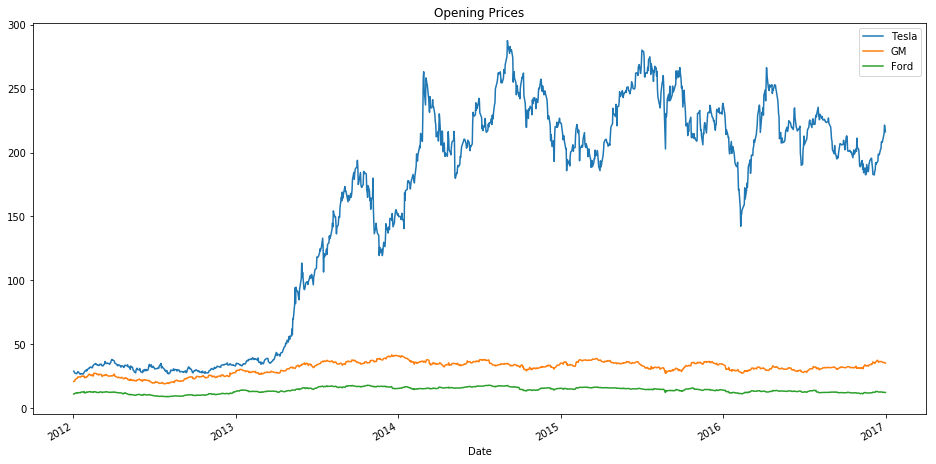

In [57]:
tesla['Open'].plot(label="Tesla", figsize=(16,8), title = 'Opening Prices')
gm['Open'].plot(label="GM")
ford['Open'].plot(label="Ford")
plt.legend();

In [58]:
gm.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714


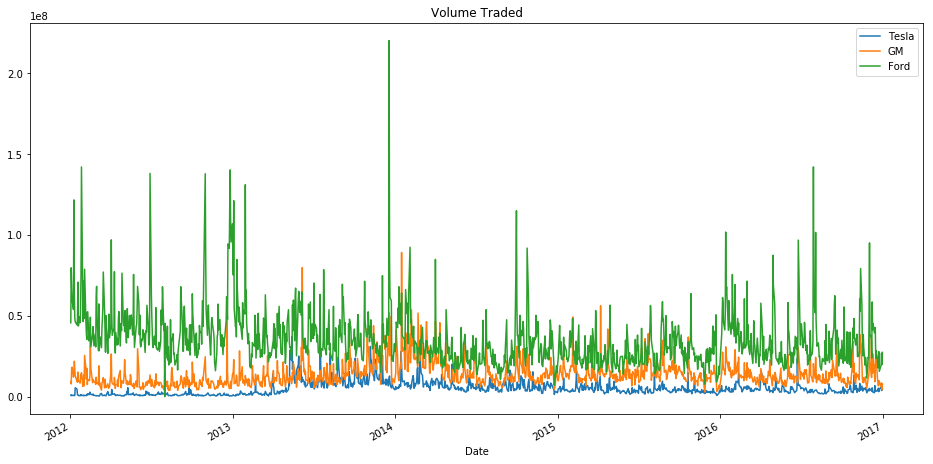

In [59]:
tesla['Volume'].plot(label="Tesla", figsize=(16,8), title = 'Volume Traded')
gm['Volume'].plot(label="GM")
ford['Volume'].plot(label="Ford")
plt.legend();

In [60]:
ford['Volume'].max()

220362796

In [61]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [62]:
ford.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467


In [70]:
ford['Open'].idxmax()

Timestamp('2013-10-24 00:00:00')

In [64]:
ford['Open'][493]

15.99

In [65]:
ford['Close'][493]

15.65

In [66]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']

In [43]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Total Traded
0,2012-01-03,28.94,29.50,27.65,28.08,928052,26857824.88
1,2012-01-04,28.21,28.67,27.50,27.71,630036,17773315.56
2,2012-01-05,27.76,27.93,26.85,27.12,1005432,27910792.32
3,2012-01-06,27.20,27.79,26.41,26.89,687081,18688603.20
4,2012-01-09,27.00,27.49,26.12,27.25,896951,24217677.00


In [71]:
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

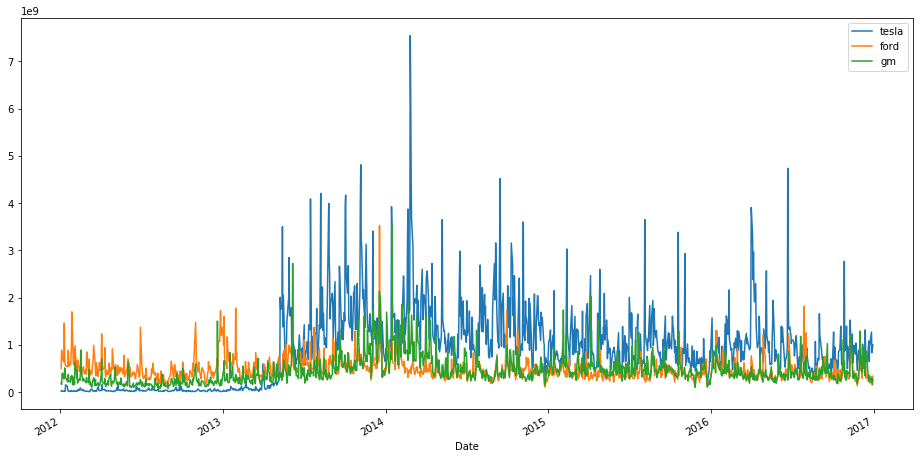

In [72]:
tesla['Total Traded'].plot(figsize=(16,8),label='tesla');
ford['Total Traded'].plot(figsize=(16,8),label='ford');
gm['Total Traded'].plot(figsize=(16,8),label='gm');
plt.legend();


In [73]:
tesla['Total Traded'].argmax()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


Timestamp('2014-02-25 00:00:00')

In [74]:
gm['MA50'] = gm['Open'].rolling(50).mean()

In [76]:
gm['MA200'] = gm['Open'].rolling(200).mean()

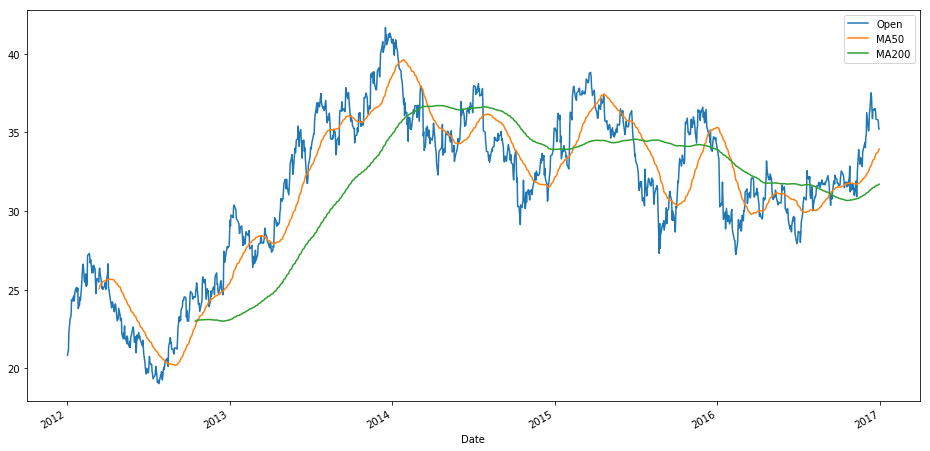

In [77]:
gm[['Open','MA50','MA200']].plot(figsize=(16,8))

In [78]:
from pandas.plotting import scatter_matrix

In [79]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']], axis = 1)

In [81]:
car_comp.columns=['Tesla Open', 'GM Open', 'Ford Open']

In [82]:
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.94,20.83,11.00
2012-01-04,28.21,21.05,11.15
2012-01-05,27.76,21.10,11.33
2012-01-06,27.20,22.26,11.74
2012-01-09,27.00,23.20,11.83


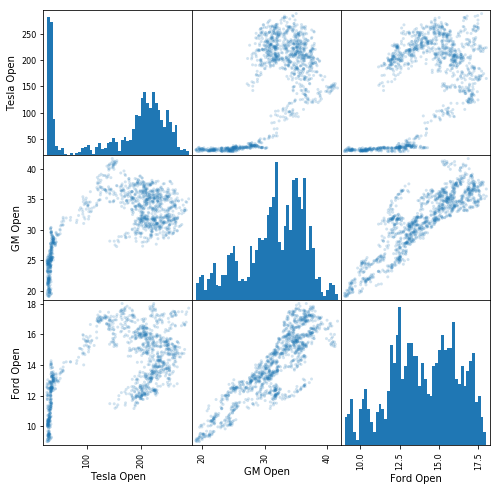

In [88]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2, hist_kwds={'bins':50});